<a href="https://colab.research.google.com/github/VarunSaiCSE/Sem5_private/blob/main/Data_Analytics_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSU MAGAZINE SALES CASE STUDY - COMPLETE ANALYSIS

PART 1: DATA EXPLORATION

Dataset Shape: (63, 18)

First few rows:
                  Unnamed: 0  Magazine Sales (Units)  Year  Week In Season  \
0     Cedar Falls University                  4165.0     1               2   
1               Oklahoma A&M                  3746.0     1               3   
2             Urbana College                  4943.0     1               5   
3  University of Bloomington                  2366.0     1               9   
4                Indiana A&M                  1796.0     1              10   

   Opponent Preseason Rank  Preseason Ticket Sales  Total Game Attendance  \
0                      120                   47420                66325.0   
1                       58                   47420                64893.0   
2                       67                   47420                70397.0   
3                       83                   47420                69185.0   
4                       74  

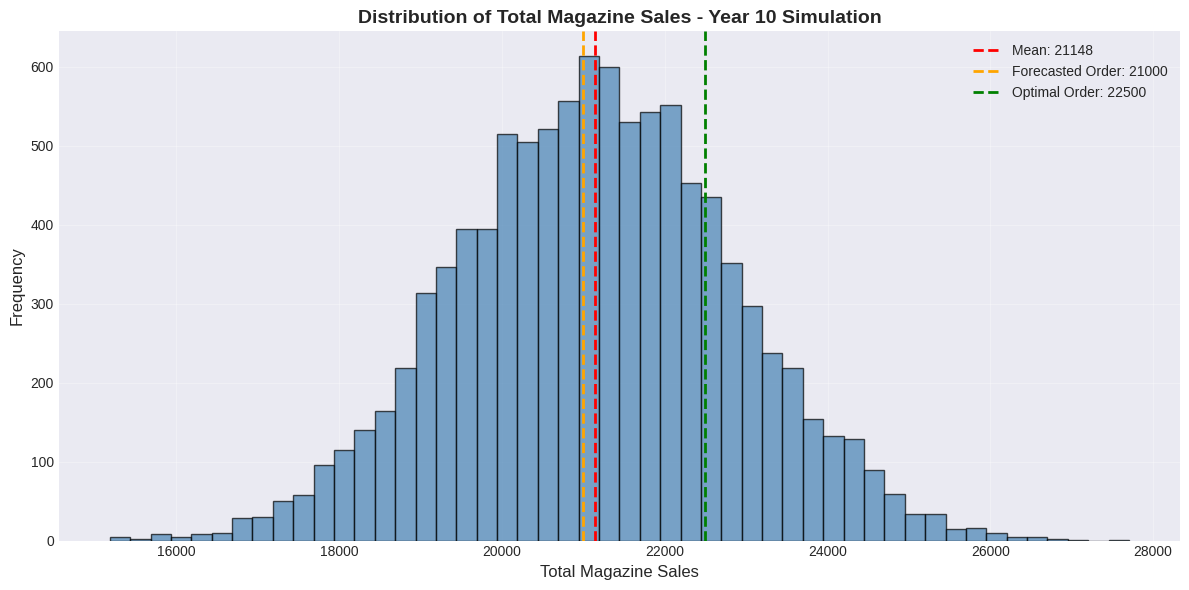

✓ Saved: simulation_distribution.png


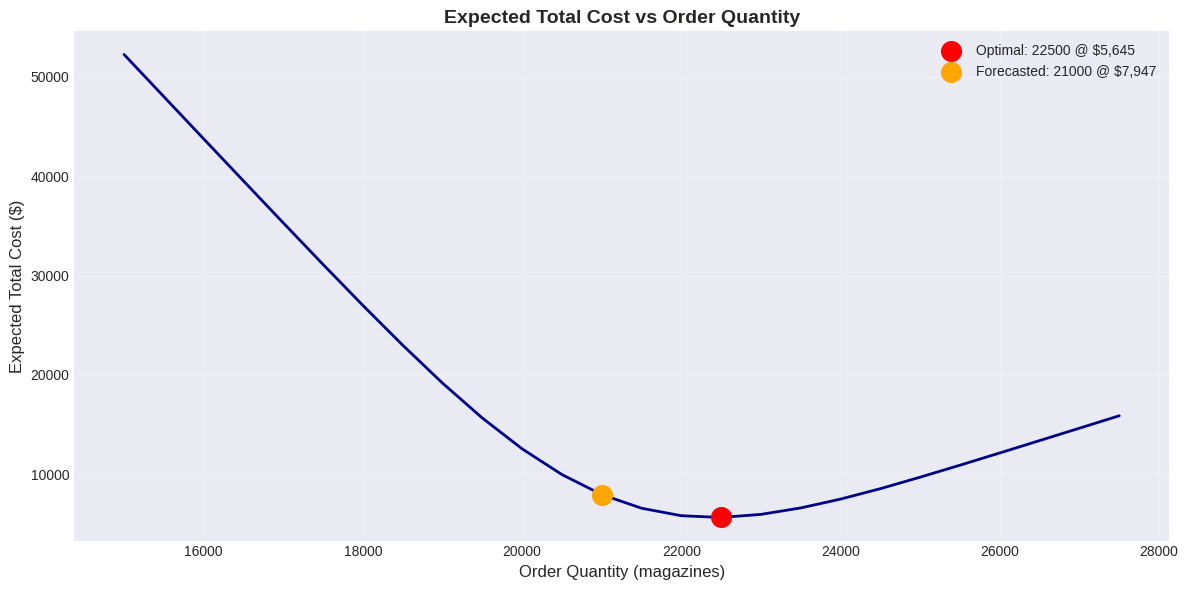

✓ Saved: cost_curve.png


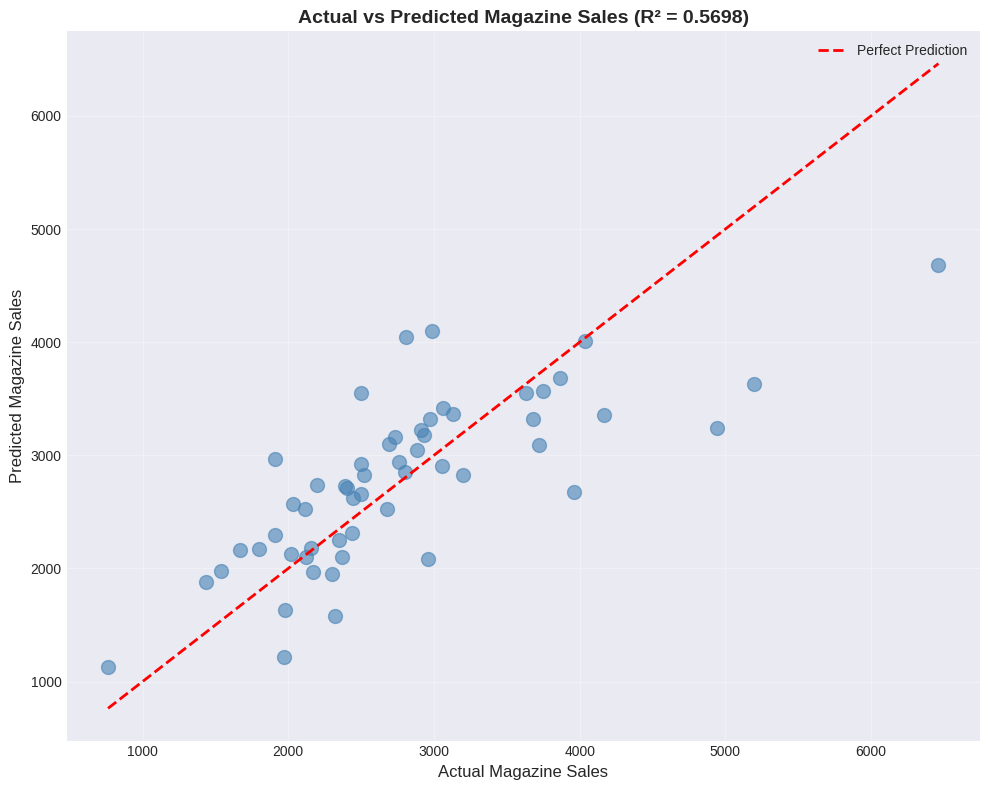

✓ Saved: actual_vs_predicted.png


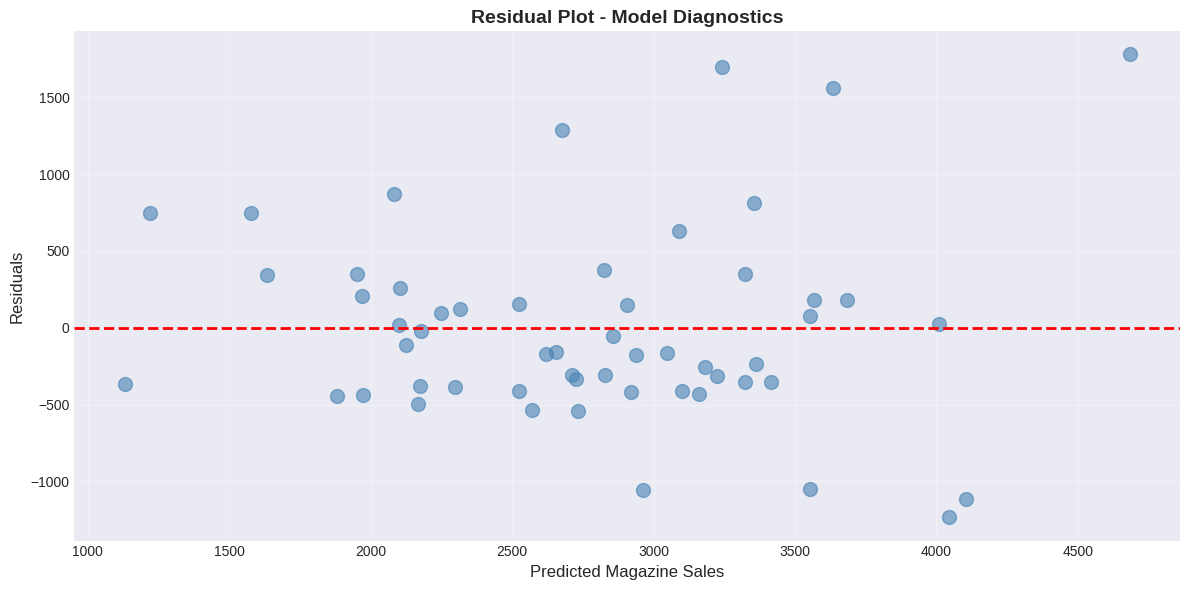

✓ Saved: residual_plot.png

FINAL SUMMARY & RECOMMENDATIONS

KEY FINDINGS:
-------------
• Regression Model R²: 0.5698 (explains 57.0% of variance)
• Expected Year 10 demand: 21148 magazines
• 95% Confidence Interval: [18338 - 23994]

COST ANALYSIS:
--------------
• Profit per magazine sold: $8.50
• Loss per unsold magazine: $2.50
• Critical ratio: 77.27%

OPTIMAL DECISION:
-----------------
• Order 22,500 magazines in July for Year 10
• Expected total cost: $5,645.43
• Savings vs forecasted order: $2,301.78
• Coverage: 78.9% of scenarios

WHY ORDER MORE THAN EXPECTED DEMAND?
-------------------------------------
• Lost sales are 3.4x more expensive than unsold magazines
• Order at 77th percentile instead of 50th (mean) to minimize total cost
• Asymmetric cost structure justifies safety stock

FILES CREATED:
--------------
✓ training_predictions.csv
✓ year10_predictions.csv
✓ simulation_results.csv
✓ order_quantity_analysis.csv
✓ simulation_distribution.png
✓ cost_curve.png
✓ actual_vs

In [1]:

# ============================================================================
# INSTALLATION & IMPORTS
# ============================================================================

# Install required packages (if not already installed)
!pip install pandas numpy scikit-learn matplotlib seaborn openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print("="*70)
print("CSU MAGAZINE SALES CASE STUDY - COMPLETE ANALYSIS")
print("="*70)

# ============================================================================
# PART 1: DATA LOADING AND EXPLORATION
# ============================================================================

print("\n" + "="*70)
print("PART 1: DATA EXPLORATION")
print("="*70)

# Load the data
df = pd.read_excel('MagazinesCSU.xlsx')

print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nBasic statistics:")
print(df.describe())

# Check years available
print(f"\nGames per year:")
print(df['Year'].value_counts().sort_index())

# ============================================================================
# PART 2: DATA PREPARATION
# ============================================================================

print("\n" + "="*70)
print("PART 2: DATA PREPARATION")
print("="*70)

# Separate training data (Years 1-9) and prediction data (Year 10)
train_df = df[df['Year'] < 10].copy()
year10_df = df[df['Year'] == 10].copy()

# Remove unnecessary columns
train_df = train_df.drop(['Unnamed: 0', 'Notes'], axis=1)
year10_df = year10_df.drop(['Unnamed: 0', 'Notes'], axis=1)

print(f"\nOriginal training data: {len(train_df)} observations")

# Remove Year 8 Week 1 anomaly (throwback jersey game)
print("\nRemoving Year 8 Week 1 outlier (throwback jersey game)...")
train_df_clean = train_df[~((train_df['Year'] == 8) & (train_df['Week In Season'] == 1))].copy()

print(f"After removing outlier: {len(train_df_clean)} observations")

# Remove rows with missing Magazine Sales
train_df_clean = train_df_clean.dropna(subset=['Magazine Sales (Units)'])
print(f"After removing missing sales: {len(train_df_clean)} observations")

# Define features
features = [
    'Week In Season',
    'Opponent Preseason Rank',
    'Preseason Ticket Sales',
    'CSU Preseason Rank',
    'Home Game Number',
    'Conference Game (1 = Yes; 0 = No)',
    'Homecoming (1 = Yes; 0 = No)',
    "Opponent's Previous Season Number of Wins",
    "Opponent's Previous Season Number of Losses",
    "CSU's Previous Season Number of Wins",
    "CSU's Previous Season Number of Losses"
]

print(f"\nFeatures selected for modeling: {len(features)}")
for i, feat in enumerate(features, 1):
    print(f"  {i}. {feat}")

# Prepare training data
X_train = train_df_clean[features]
y_train = train_df_clean['Magazine Sales (Units)']

# Check correlations
print("\nCorrelation with Magazine Sales:")
numeric_cols = train_df_clean.select_dtypes(include=[np.number]).columns
correlations = train_df_clean[numeric_cols].corr()['Magazine Sales (Units)'].sort_values(ascending=False)
print(correlations)

# ============================================================================
# PART 3: BUILD REGRESSION MODEL
# ============================================================================

print("\n" + "="*70)
print("PART 3: REGRESSION MODEL")
print("="*70)

# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training data
y_pred = model.predict(X_train)

# Calculate metrics
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

print("\nMODEL COEFFICIENTS:")
print("-" * 60)
print(f"Intercept: {model.intercept_:.2f}\n")
print("Feature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature:50s}: {coef:10.4f}")

print("\nMODEL PERFORMANCE METRICS:")
print("-" * 60)
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.2f} units")
print(f"MAE: {mae:.2f} units")

# Calculate residuals
residuals = y_train - y_pred

print("\nRESIDUAL STATISTICS:")
print("-" * 60)
print(f"Mean Residual: {residuals.mean():.2f}")
print(f"Std Dev of Residuals: {residuals.std():.2f}")
print(f"Min Residual: {residuals.min():.2f}")
print(f"Max Residual: {residuals.max():.2f}")

# Save training predictions
train_comparison = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred,
    'Residual': residuals,
    'Abs_Residual': np.abs(residuals)
})
train_comparison.to_csv('training_predictions.csv', index=False)
print("\n✓ Saved: training_predictions.csv")

# ============================================================================
# PART 4: PREDICT YEAR 10 SALES
# ============================================================================

print("\n" + "="*70)
print("PART 4: YEAR 10 PREDICTIONS")
print("="*70)

# Prepare Year 10 data
X_year10 = year10_df[features]

# Make predictions
y_year10_pred = model.predict(X_year10)

# Create results dataframe
year10_predictions = pd.DataFrame({
    'Home_Game_Number': year10_df['Home Game Number'].values,
    'Week_In_Season': year10_df['Week In Season'].values,
    'Conference_Game': year10_df['Conference Game (1 = Yes; 0 = No)'].values,
    'Homecoming': year10_df['Homecoming (1 = Yes; 0 = No)'].values,
    'Predicted_Magazine_Sales': y_year10_pred
})

print("\nPREDICTED MAGAZINE SALES FOR YEAR 10:")
print("-" * 60)
print(year10_predictions)

print(f"\nAverage predicted sales per game: {y_year10_pred.mean():.0f} magazines")
print(f"Total predicted sales for all 7 games: {y_year10_pred.sum():.0f} magazines")
print(f"Min predicted sales: {y_year10_pred.min():.0f} magazines")
print(f"Max predicted sales: {y_year10_pred.max():.0f} magazines")

# Save Year 10 predictions
year10_predictions.to_csv('year10_predictions.csv', index=False)
print("\n✓ Saved: year10_predictions.csv")

# ============================================================================
# PART 5: MONTE CARLO SIMULATION
# ============================================================================

print("\n" + "="*70)
print("PART 5: MONTE CARLO SIMULATION")
print("="*70)

# Standard error of prediction
std_error = residuals.std()

print(f"\nStandard error from regression model: {std_error:.2f} magazines")

# Run Monte Carlo simulation
np.random.seed(42)  # For reproducibility
n_simulations = 10000

print(f"Running {n_simulations} simulations...")

# Store simulation results
simulation_results = []

for i in range(n_simulations):
    # For each simulation, generate sales for all 7 games
    game_sales = []
    for j in range(7):
        # Add random error based on residual distribution
        predicted_sales = y_year10_pred[j]
        simulated_sales = predicted_sales + np.random.normal(0, std_error)
        # Ensure non-negative sales
        simulated_sales = max(0, simulated_sales)
        game_sales.append(simulated_sales)

    # Total sales for this simulation
    total_sales = sum(game_sales)
    simulation_results.append({
        'simulation': i + 1,
        'game1': game_sales[0],
        'game2': game_sales[1],
        'game3': game_sales[2],
        'game4': game_sales[3],
        'game5': game_sales[4],
        'game6': game_sales[5],
        'game7': game_sales[6],
        'total_sales': total_sales
    })

# Convert to dataframe
simulation_df = pd.DataFrame(simulation_results)

# Calculate statistics
print("\nSIMULATION RESULTS:")
print("-" * 60)
print(f"Mean total sales: {simulation_df['total_sales'].mean():.0f} magazines")
print(f"Median total sales: {simulation_df['total_sales'].median():.0f} magazines")
print(f"Std Dev: {simulation_df['total_sales'].std():.0f} magazines")
print(f"Min total sales: {simulation_df['total_sales'].min():.0f} magazines")
print(f"Max total sales: {simulation_df['total_sales'].max():.0f} magazines")

# Confidence intervals
print("\nCONFIDENCE INTERVALS:")
print("-" * 60)
percentiles = [5, 25, 50, 75, 95]
for p in percentiles:
    value = np.percentile(simulation_df['total_sales'], p)
    print(f"{p}th percentile: {value:.0f} magazines")

# Save simulation results
simulation_df.head(1000).to_csv('simulation_results.csv', index=False)
print("\n✓ Saved: simulation_results.csv (first 1000 simulations)")

# ============================================================================
# PART 6: COST ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("PART 6: COST ANALYSIS")
print("="*70)

# Given costs from case study
cost_per_magazine = 14.00  # CSU pays publisher
selling_price = 25.00  # Vendors sell magazines
csu_payment_per_sold = 2.50  # CSU pays vendor per magazine sold
buyback_price = 11.50  # Publisher buys back unsold magazines

# Calculate profits and losses
revenue_per_sold = selling_price - csu_payment_per_sold
profit_per_sold = revenue_per_sold - cost_per_magazine
loss_per_unsold = cost_per_magazine - buyback_price

print("\nCOST STRUCTURE:")
print("-" * 60)
print(f"Cost to order from publisher: ${cost_per_magazine:.2f} per magazine")
print(f"Selling price at game: ${selling_price:.2f} per magazine")
print(f"Payment to vendor per sold magazine: ${csu_payment_per_sold:.2f}")
print(f"Buyback price for unsold magazines: ${buyback_price:.2f} per magazine")

print("\nPROFIT/LOSS CALCULATIONS:")
print("-" * 60)
print(f"Revenue per magazine sold: ${revenue_per_sold:.2f}")
print(f"Profit per magazine sold: ${profit_per_sold:.2f}")
print(f"Loss per unsold magazine: ${loss_per_unsold:.2f}")

# Critical ratio
critical_ratio = profit_per_sold / (profit_per_sold + loss_per_unsold)
print(f"\nCritical Ratio: {critical_ratio:.4f} or {critical_ratio*100:.2f}%")

# Analyze 21,500 magazine order (from case study)
order_quantity = 21500

print(f"\n\nANALYZING ORDER OF {order_quantity:,} MAGAZINES:")
print("="*60)

# Calculate costs for this order quantity
lost_sales_costs = []
unsold_costs = []
total_costs = []

for idx, row in simulation_df.iterrows():
    actual_demand = row['total_sales']

    if actual_demand <= order_quantity:
        sold = actual_demand
        unsold = order_quantity - actual_demand
        lost_sales = 0
    else:
        sold = order_quantity
        unsold = 0
        lost_sales = actual_demand - order_quantity

    cost_of_lost_sales = lost_sales * profit_per_sold
    cost_of_unsold = unsold * loss_per_unsold
    total_cost = cost_of_lost_sales + cost_of_unsold

    lost_sales_costs.append(cost_of_lost_sales)
    unsold_costs.append(cost_of_unsold)
    total_costs.append(total_cost)

print(f"\nExpected cost of lost sales: ${np.mean(lost_sales_costs):,.2f}")
print(f"Expected cost of unsold magazines: ${np.mean(unsold_costs):,.2f}")
print(f"Total expected cost: ${np.mean(total_costs):,.2f}")

prob_shortage = (simulation_df['total_sales'] > order_quantity).sum() / len(simulation_df)
prob_excess = (simulation_df['total_sales'] < order_quantity).sum() / len(simulation_df)
print(f"\nProbability of running out: {prob_shortage:.1%}")
print(f"Probability of having excess: {prob_excess:.1%}")

# ============================================================================
# PART 7: FIND OPTIMAL ORDER QUANTITY
# ============================================================================

print("\n" + "="*70)
print("PART 7: OPTIMAL ORDER QUANTITY")
print("="*70)

# Must order in batches of 500
batch_size = 500

# Test different order quantities
order_quantities = range(15000, 28000, batch_size)

results = []

print("\nTesting order quantities from 15,000 to 28,000...")

for order_qty in order_quantities:
    lost_sales_costs = []
    unsold_costs = []
    total_costs = []

    for idx, row in simulation_df.iterrows():
        actual_demand = row['total_sales']

        if actual_demand <= order_qty:
            sold = actual_demand
            unsold = order_qty - actual_demand
            lost_sales = 0
        else:
            sold = order_qty
            unsold = 0
            lost_sales = actual_demand - order_qty

        cost_of_lost_sales = lost_sales * profit_per_sold
        cost_of_unsold = unsold * loss_per_unsold
        total_cost = cost_of_lost_sales + cost_of_unsold

        total_costs.append(total_cost)

    avg_total_cost = np.mean(total_costs)

    results.append({
        'order_quantity': order_qty,
        'avg_total_cost': avg_total_cost,
        'std_cost': np.std(total_costs),
        'min_cost': np.min(total_costs),
        'max_cost': np.max(total_costs)
    })

results_df = pd.DataFrame(results)

# Find optimal order quantity
optimal_idx = results_df['avg_total_cost'].idxmin()
optimal_order = results_df.loc[optimal_idx, 'order_quantity']
optimal_cost = results_df.loc[optimal_idx, 'avg_total_cost']

print(f"\n✓ OPTIMAL ORDER QUANTITY: {optimal_order:,.0f} magazines")
print(f"✓ Expected total cost: ${optimal_cost:,.2f}")

print("\nTOP 10 ORDER QUANTITIES (by lowest expected cost):")
print("-" * 70)
top10 = results_df.nsmallest(10, 'avg_total_cost')
print(top10.to_string(index=False))

# Save results
results_df.to_csv('order_quantity_analysis.csv', index=False)
print("\n✓ Saved: order_quantity_analysis.csv")

# Compare with forecasted amount
forecasted_qty_exact = simulation_df['total_sales'].mean()
forecasted_qty_batches = round(forecasted_qty_exact / batch_size) * batch_size

print(f"\n\nCOMPARISON:")
print("-" * 70)
print(f"Forecasted demand: {forecasted_qty_exact:.0f} magazines")
print(f"Forecasted demand (rounded to batches): {forecasted_qty_batches:.0f}")
print(f"Optimal order quantity: {optimal_order:.0f} magazines")
print(f"Difference: {optimal_order - forecasted_qty_batches:.0f} magazines")

forecasted_cost = results_df[results_df['order_quantity'] == forecasted_qty_batches]['avg_total_cost'].values[0]
print(f"\nExpected cost if ordering forecasted amount: ${forecasted_cost:,.2f}")
print(f"Expected cost if ordering optimal amount: ${optimal_cost:,.2f}")
print(f"💰 SAVINGS with optimal order: ${forecasted_cost - optimal_cost:,.2f}")

# ============================================================================
# PART 8: VISUALIZATIONS
# ============================================================================

print("\n" + "="*70)
print("PART 8: CREATING VISUALIZATIONS")
print("="*70)

# Set up figure style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Simulation Distribution Histogram
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(simulation_df['total_sales'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(simulation_df['total_sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {simulation_df["total_sales"].mean():.0f}')
ax.axvline(forecasted_qty_batches, color='orange', linestyle='--', linewidth=2, label=f'Forecasted Order: {forecasted_qty_batches:.0f}')
ax.axvline(optimal_order, color='green', linestyle='--', linewidth=2, label=f'Optimal Order: {optimal_order:.0f}')
ax.set_xlabel('Total Magazine Sales', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Total Magazine Sales - Year 10 Simulation', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('simulation_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: simulation_distribution.png")

# 2. Cost Curve
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(results_df['order_quantity'], results_df['avg_total_cost'], linewidth=2, color='darkblue')
ax.scatter([optimal_order], [optimal_cost], color='red', s=200, zorder=5, label=f'Optimal: {optimal_order:.0f} @ ${optimal_cost:,.0f}')
ax.scatter([forecasted_qty_batches], [forecasted_cost], color='orange', s=200, zorder=5, label=f'Forecasted: {forecasted_qty_batches:.0f} @ ${forecasted_cost:,.0f}')
ax.set_xlabel('Order Quantity (magazines)', fontsize=12)
ax.set_ylabel('Expected Total Cost ($)', fontsize=12)
ax.set_title('Expected Total Cost vs Order Quantity', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('cost_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: cost_curve.png")

# 3. Actual vs Predicted
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_train, y_pred, alpha=0.6, s=100, color='steelblue')
min_val = min(y_train.min(), y_pred.min())
max_val = max(y_train.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Magazine Sales', fontsize=12)
ax.set_ylabel('Predicted Magazine Sales', fontsize=12)
ax.set_title(f'Actual vs Predicted Magazine Sales (R² = {r2:.4f})', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: actual_vs_predicted.png")

# 4. Residual Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(y_pred, residuals, alpha=0.6, s=100, color='steelblue')
ax.axhline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Magazine Sales', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax.set_title('Residual Plot - Model Diagnostics', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: residual_plot.png")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY & RECOMMENDATIONS")
print("="*70)

summary = f"""
KEY FINDINGS:
-------------
• Regression Model R²: {r2:.4f} (explains {r2*100:.1f}% of variance)
• Expected Year 10 demand: {simulation_df['total_sales'].mean():.0f} magazines
• 95% Confidence Interval: [{np.percentile(simulation_df['total_sales'], 5):.0f} - {np.percentile(simulation_df['total_sales'], 95):.0f}]

COST ANALYSIS:
--------------
• Profit per magazine sold: ${profit_per_sold:.2f}
• Loss per unsold magazine: ${loss_per_unsold:.2f}
• Critical ratio: {critical_ratio:.2%}

OPTIMAL DECISION:
-----------------
• Order {optimal_order:,.0f} magazines in July for Year 10
• Expected total cost: ${optimal_cost:,.2f}
• Savings vs forecasted order: ${forecasted_cost - optimal_cost:,.2f}
• Coverage: {((simulation_df['total_sales'] <= optimal_order).sum() / len(simulation_df) * 100):.1f}% of scenarios

WHY ORDER MORE THAN EXPECTED DEMAND?
-------------------------------------
• Lost sales are 3.4x more expensive than unsold magazines
• Order at 77th percentile instead of 50th (mean) to minimize total cost
• Asymmetric cost structure justifies safety stock

FILES CREATED:
--------------
✓ training_predictions.csv
✓ year10_predictions.csv
✓ simulation_results.csv
✓ order_quantity_analysis.csv
✓ simulation_distribution.png
✓ cost_curve.png
✓ actual_vs_predicted.png
✓ residual_plot.png
"""

print(summary)

print("="*70)
print("ANALYSIS COMPLETE! 🎉")
print("="*70)